<a href="https://colab.research.google.com/github/jasonstoy/TensorFlow/blob/main/4.%20Regression%20in%20Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.6.0


In [2]:
X = np.array(range(-7,15,3))
y = np.array(range(3,25,3))

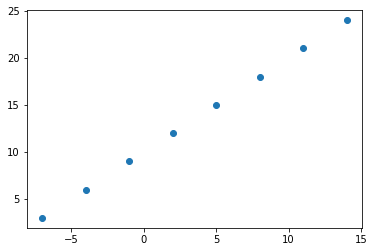

In [3]:
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
# input and output shapes
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
# seed
tf.random.set_seed(42)

X = tf.constant(X)
y= tf.constant(y)

# 1. create a model using sequestial API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# model.add(tf.keras.layers.Dense(1)

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #"sgd"
              metrics=["mae"])

# 3. fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [7]:
# check out X,y
X,y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [8]:
y_pred = model.predict([17.])
y_pred

array([[12.716021]], dtype=float32)

In [9]:
# improve the model

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1))


model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 423ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.9863 - mae: 12.9863
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.0173 - mae: 12.0173
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1308 - mae: 11.1308
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3344 - mae: 10.3344
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.5212 - mae: 9.5212
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.6917 - mae: 8.6917
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.8487 - mae: 7.8487
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9852 - mae: 6.9852
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.0979 - mae: 6.0979
Epoch 11/100
1/1 [==============================] - 0s 13ms/step 

In [10]:
y_pred = model.predict([17.])
y_pred

array([[25.942049]], dtype=float32)

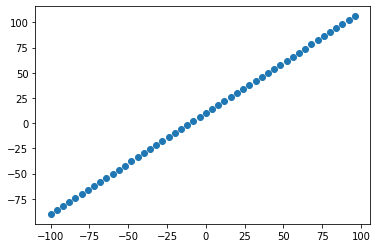

In [11]:
#Bigger Dataset

X = tf.range(-100, 100, 4)
y = X + 10

plt.scatter(X,y)

In [12]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

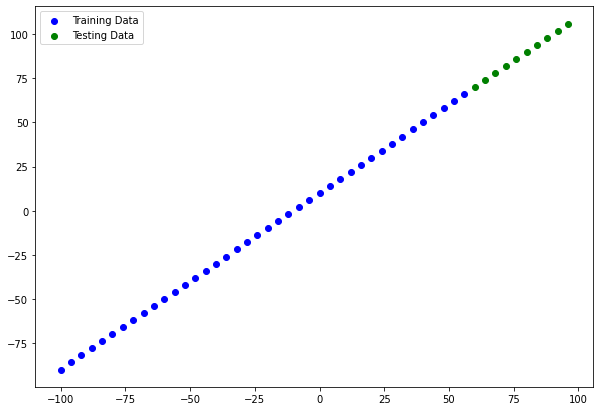

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b" ,label="Training Data")
plt.scatter(X_test,y_test,c="g" ,label = "Testing Data")
plt.legend()

In [14]:
# Build a model with input shape for auto-build
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_example")

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae'])

model.summary()

Model: "model_example"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [16]:
from tensorflow.keras.utils import plot_model

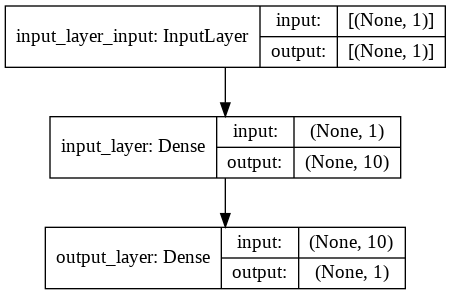

In [17]:
plot_model(model=model, show_shapes=True)

In [18]:
# visualize predictions

y_pred = model.predict(X_test)
y_pred

array([[53.968506],
       [57.511436],
       [61.054363],
       [64.59729 ],
       [68.140205],
       [71.683136],
       [75.22606 ],
       [78.76899 ],
       [82.31191 ],
       [85.85484 ]], dtype=float32)

In [19]:
# plot Fn
def plot_fn(train_data=X_train,
            train_labels=y_train,
            test_data=X_test,
            test_labels=y_test,
            preditions=y_pred):
  
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b" ,label="Training Data")
  plt.scatter(test_data,test_labels,c="g" ,label = "Testing Data")
  plt.scatter(preditions,test_labels,c="r" ,label = "Prediction Data")
  plt.legend()

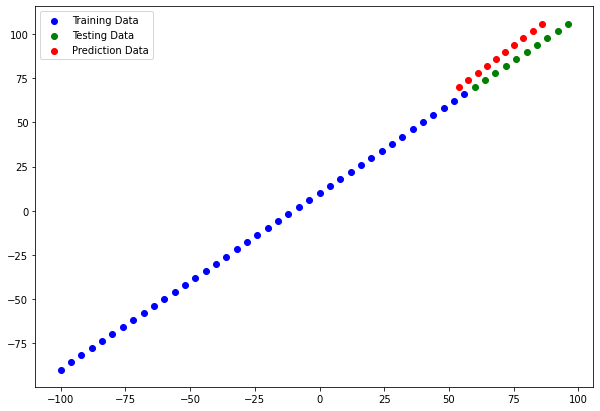

In [20]:
plot_fn()

In [21]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 132ms/step - loss: 18.0883 - mae: 18.0883


[18.088327407836914, 18.088327407836914]

In [85]:
# Calculate error
tf.keras.losses.mse(y_test,tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=328.91107>

In [22]:
# make function for mae and mse
def mae(y_true, y_pred):
  return tf.keras.losses.mae(y_true, y_pred)

def mse(y_true, y_pred):
  return tf.keras.losses.mse(y_true, y_pred)

In [38]:
# running experiments to improve the model

tf.random.set_seed(42)

model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Dense(1, input_shape=[1]))

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(X_train, y_train, epochs=100, verbose=0)

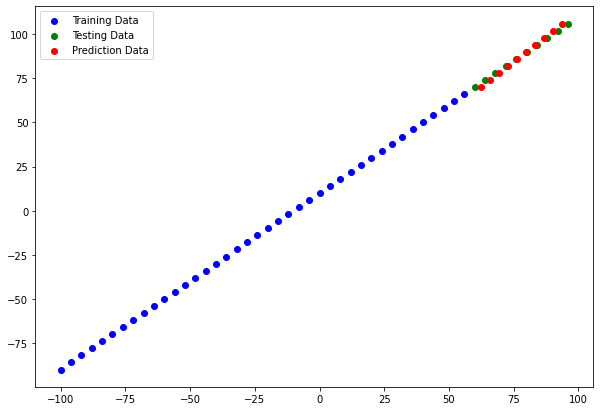

In [39]:
y_pred_1 = model_1.predict(y_test)
plot_fn(train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        preditions=y_pred_1)

In [41]:
mae_1 = mae(y_test, tf.squeeze(y_pred_1))
mse_1 = mse(y_test, tf.squeeze(y_pred_1))

In [35]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Dense(10, input_shape=[1]))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [42]:
y_pred_2 = model_2.predict(y_test)

mae_2 = mae(y_test, tf.squeeze(y_pred_2))
mse_2 = mse(y_test, tf.squeeze(y_pred_2))

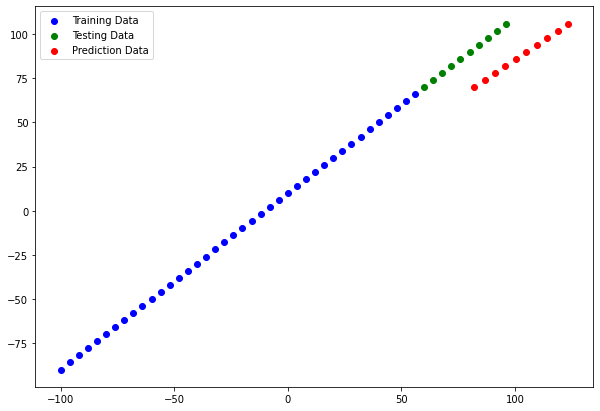

In [37]:
plot_fn(train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        preditions=y_pred_2)

In [43]:
tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential()
model_3.add(tf.keras.layers.Dense(10, input_shape=[1]))
model_3.add(tf.keras.layers.Dense(1))

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_3.fit(X_train, y_train, epochs=500, verbose=0)



In [44]:
y_pred_3 = model_3.predict(y_test)

mae_3 = mae(y_test, tf.squeeze(y_pred_3))
mse_3 = mse(y_test, tf.squeeze(y_pred_3))

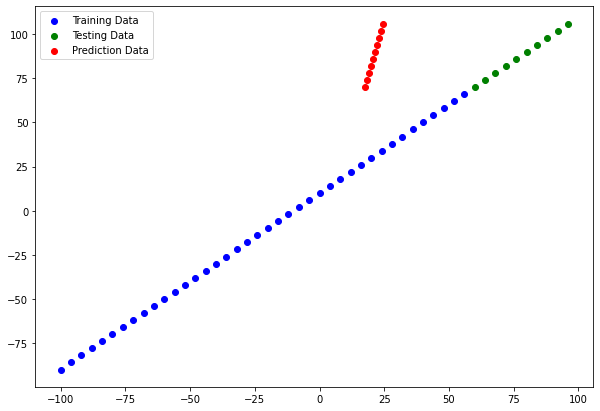

In [45]:
plot_fn(train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        preditions=y_pred_3)

In [49]:
import pandas as pd

model_results = [["model_1" ,mae_1.numpy(), mse_1.numpy()],
                 ["model_2" ,mae_2.numpy(), mse_2.numpy()],
                 ["model_3" ,mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model_id', 'mae', 'mse'])
all_results

,model_id,mae,mse
0,model_1,10.032228,102.831650
1,model_2,14.666269,217.949173
2,model_3,66.807144,4549.662109


In [50]:
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [51]:
# saving models
# 1.SavedModel format
# 2.HDF5
model_1.save("model_1_save_model")

INFO:tensorflow:Assets written to: model_1_save_model/assets


In [52]:
model_1.save("model_1_save_model.h5")

In [53]:
#load models
model_1_loaded = tf.keras.models.load_model("model_1_save_model")

In [55]:
model_1_loaded.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_1_loaded = tf.keras.models.load_model("model_1_save_model.h5")
model_1_loaded.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
